<a href="https://colab.research.google.com/github/gulnurdeviren/Star/blob/main/star_yeni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving spec_table.d to spec_table.d
     #SpT   Teff  Bp-Rp
24    B9V  10700  0.120
25  B9.5V  10400  0.087
26    A0V   9700  0.037
27    A1V   9300  0.005
28    A2V   8800  0.068
29    A3V   8600  0.110
30    A4V   8250  0.166
31    A5V   8100  0.194
32    A6V   7910  0.222
33    A7V   7760  0.263
Index(['#SpT', 'Teff', 'Bp-Rp'], dtype='object')
1.666760140762869e-05
7.688627427369931e-08
Model 1  Performans Değerlendirmesi:
R² Skoru: 0.9552
MAE (Ortalama Mutlak Hata): 260.4443
MSE (Ortalama Karesel Hata): 294478.1313
--------------------------------------------------
1.666760140762797e-05
7.688627427373953e-08
Model 2  Performans Değerlendirmesi:
R² Skoru: 0.9552
MAE (Ortalama Mutlak Hata): 260.4443
MSE (Ortalama Karesel Hata): 294478.1313
--------------------------------------------------


/tmp/ipython-input-1-1626627907.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv('spec_table.d',delim_whitespace=True)


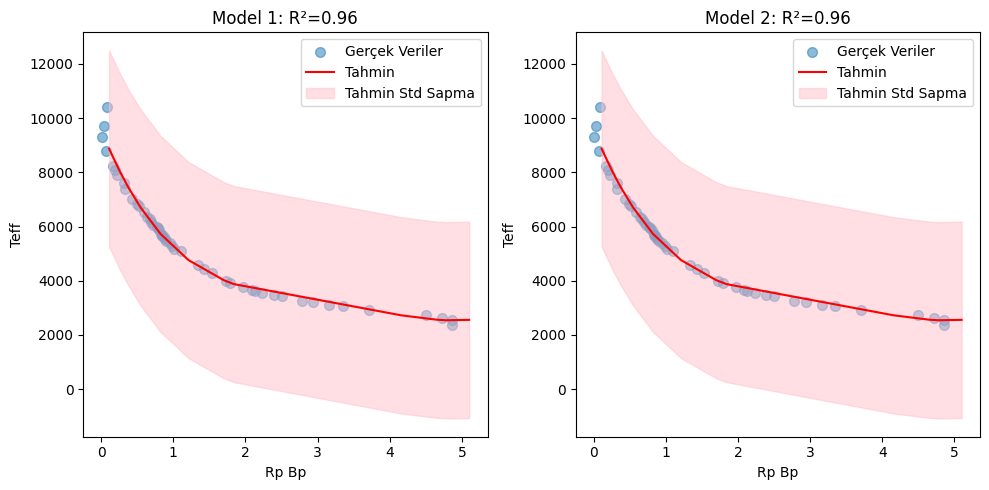

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

uploaded = files.upload()
df=pd.read_csv('spec_table.d',delim_whitespace=True)
df.replace("...", np.nan,inplace=True)  # Boş değerleri NaN yap
df=df.dropna()
print(df.head(10))
print(df.columns)

x=df['Bp-Rp'].values.astype(float)
y=df['Teff'].values

n_order = 4
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train_vander = np.vander(x_train, n_order + 1, increasing=True)
x_test_vander=np.vander(x_test,n_order+1,increasing=True)

reg = BayesianRidge(tol=1e-6, fit_intercept=True, compute_score=True)#BU KISMIDA FİT KISMINI TRUE YAP İLERDE NE DEĞİŞECEK

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
fig,axes=plt.subplots(1,2,figsize=(10,5))

for i, ax in enumerate(axes):
  if i == 0:
        init = [1 / np.var(y_train), 1.0]
  elif i == 1:
        init = [0.1, 1e-3]
  reg.set_params(alpha_init=init[0], lambda_init=init[1])

  reg.fit(x_train_vander, y_train)


  y_mean, y_std = reg.predict(x_test_vander, return_std=True)
  r2 = r2_score(y_test, y_mean)
  mae = mean_absolute_error(y_test, y_mean)
  mse = mean_squared_error(y_test, y_mean)
  rmse = np.sqrt(mse)
  print(reg.alpha_)
  print(reg.lambda_)


  print(f"Model {i+1}  Performans Değerlendirmesi:")
  print(f"R² Skoru: {r2:.4f}")
  print(f"MAE (Ortalama Mutlak Hata): {mae:.4f}")
  print(f"MSE (Ortalama Karesel Hata): {mse:.4f}")
  print("-" * 50)

  ax.scatter(x_train_vander[:, 1], y_train, s=50, alpha=0.5, label="Gerçek Veriler")
  sorted_indices = np.argsort(x_test_vander[:, 1])
  ax.plot(x_test_vander[:, 1][sorted_indices], y_mean[sorted_indices], color="red", label="Tahmin")
  ax.fill_between(x_test_vander[:, 1][sorted_indices],
                    y_mean[sorted_indices] - y_std[sorted_indices],
                    y_mean[sorted_indices] + y_std[sorted_indices],
                    color="pink", alpha=0.5, label="Tahmin Std Sapma")
  ax.set_title(f"Model {i+1}: R²={r2:.2f}")
  ax.set_xlabel("Rp Bp")
  ax.set_ylabel("Teff")
  ax.legend()

plt.tight_layout()
plt.show()



In [ ]:
aralık=[(0.0,2.0),(2.0,5.0)]
print("Kesikli Polinom Denklemler:\n")
for low, high in aralık:
    mask = (x >= low) & (x <= high)
    x_sub = x[mask]
    y_sub = y[mask]

    if len(x_sub) == 0:
        continue


    x_vander = np.vander(x_sub, n_order + 1, increasing=True)


    reg.fit(x_vander, y_sub)


    intercept = reg.intercept_
    coef = reg.coef_

    denklem = f"Teff = {intercept:.4f}"
    for d in range(1, len(coef)):
        denklem += f" + {coef[d]:.4f}*(Bp-Rp)^{d}"

    print(f"{low:.1f} ≤ Bp-Rp < {high:.1f} → {denklem}")
    print(sum((x>= 2.0) & (x < 5.0)))


Kesikli Polinom Denklemler:

0.0 ≤ Bp-Rp < 2.0 → Teff = 9743.1131 + -7040.9940*(Bp-Rp)^1 + 2659.0991*(Bp-Rp)^2 + 95.1592*(Bp-Rp)^3 + -217.2872*(Bp-Rp)^4
17
2.0 ≤ Bp-Rp < 5.0 → Teff = 4859.1213 + -195.8635*(Bp-Rp)^1 + -428.0821*(Bp-Rp)^2 + 146.6607*(Bp-Rp)^3 + -14.6265*(Bp-Rp)^4
17


Saving variable_members.dat to variable_members (1).dat
Yeni BPRP Değerlerinden ilk 10 tanesi: [1.213162 1.634713 1.646241 1.285448 1.559064 2.373485 1.899803 2.222703
 1.955987]


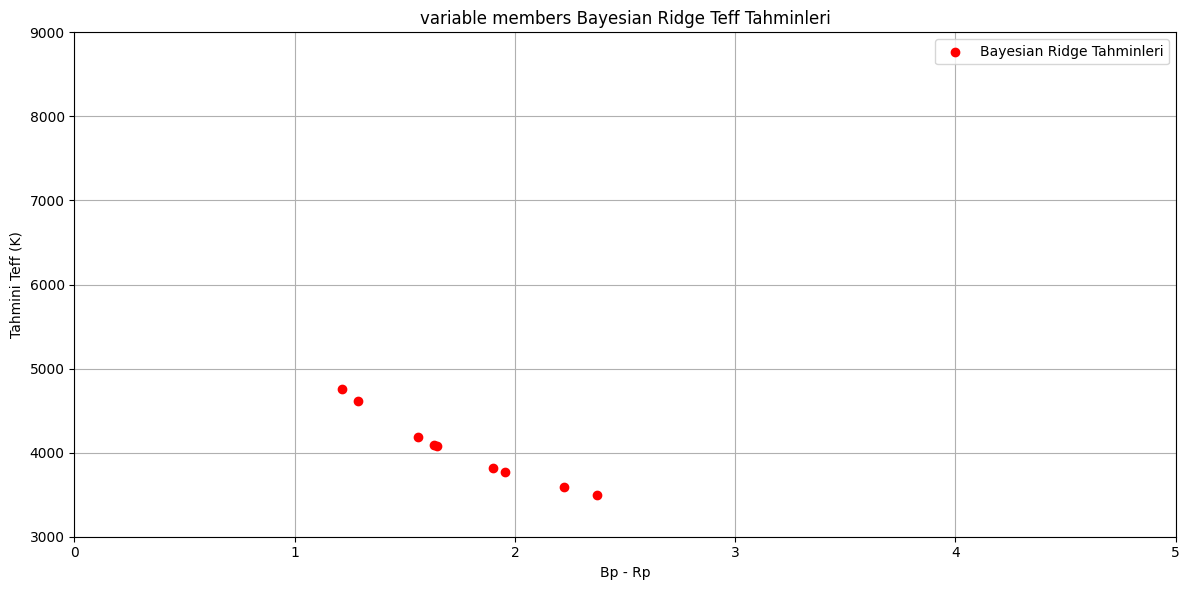

[4757.46013361 4096.00079212 4082.18598929 4619.52446112 4191.6011884
 3499.66121827 3822.32669133 3585.61591835 3774.66724139]
Tahminler 'bayesian_ridge_teff_predictions.csv' dosyasına kaydedildi.


In [7]:
uploaded2 = files.upload()

# İlk 15 sütunu kullan (sayısal olanlar)
column_names = [
    "id", "RA", "Dec", "pmRA", "epmRA", "pmDec", "epmDec",
    "Plx", "ePlx", "Gmag", "eGmag", "BPmag", "eBPmag", "RPmag", "eRPmag"
]
df_var = pd.read_csv(
    'variable_members.dat',
    sep=r'\s+',
    header=None,
    names=column_names,
    usecols=range(15),   # Sadece ilk 18 sütunu oku
    skiprows=1            # İlk satır comment veya açıklama satırıysa atla
)
# Test verisini oluştur
df_var["Bp-Rp"] = df_var["BPmag"] - df_var["RPmag"]
df_var["Hata"] = 0.05
bprp = df_var[["Bp-Rp", "Hata"]].copy()


bprp_ = bprp["Bp-Rp"].values.astype(float)
print("Yeni BPRP Değerlerinden ilk 10 tanesi:", bprp_[:10])

bprp_vander = np.vander(bprp_, n_order + 1, increasing=True)
teff_ = reg.predict(bprp_vander)


bprp["Teff_Tahmini_BayesRidge"] = teff_
plt.figure(figsize=(12, 6))
plt.scatter(bprp_, teff_, color='red', label='Bayesian Ridge Tahminleri')
plt.xlabel("Bp - Rp")
plt.ylabel("Tahmini Teff (K)")
plt.title("variable members Bayesian Ridge Teff Tahminleri")
plt.xlim(0.0, 5.0)
plt.ylim(3000, 9000)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print(teff_)
# Dosyaya yaz
bprp.to_csv("bayesian_ridge_teff_predictions.csv", index=False)

print("Tahminler 'bayesian_ridge_teff_predictions.csv' dosyasına kaydedildi.")


Saving UPK_220.gaia to UPK_220.gaia
  id RA Dec pmRA epmRA pmDec epmDec Plx ePlx Gmag eGmag BPmag eBPmag RPmag eRPmag probs_final
0  id RA Dec pmRA epmRA pmDec epmDec Plx ePlx Gma...                                         
1  104 350.02681639545 66.24882164268 -2.432 0.61...                                         
2  110 350.44714765867 66.56156012588 -2.598 0.22...                                         
3  12 351.9113703792 66.64394200622 -3.403 0.167 ...                                         
4  13 350.32291275884 66.59659584481 -3.049 0.28 ...                                         
Index(['id RA Dec pmRA epmRA pmDec epmDec Plx ePlx Gmag eGmag BPmag eBPmag RPmag eRPmag probs_final'], dtype='object')
Yeni BPRP Değerlerinden ilk 10 tanesi: [1.680128 2.580133 2.588924 2.580906 2.488342 1.740373 2.596641 1.596422
 2.120093 1.8088  ]


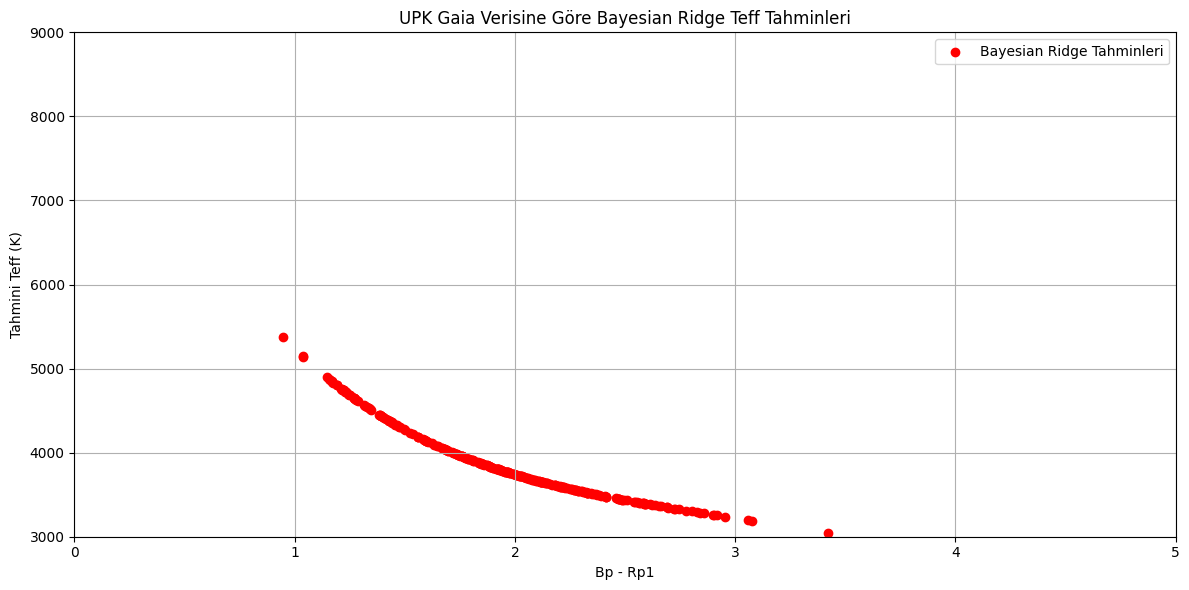

In [3]:
#uploaded=files.upload()# tahmin yapacağımız veri setimizi yükledik bu şekilde ilki ile modeli eğittik şimdi test edecğiz
#bprp=pd.read_csv('bprp.data',delim_whitespace=True,header=None,names=['Bp-Rp', 'Hata'])
#print(bprp.head())
#bprp_values=bprp['Bp-Rp'].values.astype(float)


from sklearn.preprocessing import StandardScaler
uploaded1 = files.upload()


df_upk = pd.read_fwf('UPK_220.gaia')


print(df_upk.head())
print(df_upk.columns)

column_names = [
    "id", "RA", "Dec", "pmRA", "epmRA", "pmDec", "epmDec",
    "Plx", "ePlx", "Gmag", "eGmag", "BPmag", "eBPmag",
    "RPmag", "eRPmag", "probs_final"
]

# UPK dosyasını okuma
df_upk = pd.read_csv(
    'UPK_220.gaia',
    sep=r'\s+',
    names=column_names + ["label"],
    skiprows=2
    )

# Test verisini oluştur
df_upk["Bp-Rp1"] = df_upk["BPmag"] - df_upk["RPmag"]
df_upk["Hata"] = 0.05
bprp = df_upk[["Bp-Rp1", "Hata"]].copy()

# ÖNEMLİ: bprp_values değişkenini güncelle ve print et!
bprp_values = bprp["Bp-Rp1"].values.astype(float)
print("Yeni BPRP Değerlerinden ilk 10 tanesi:", bprp_values[:10])
# Vandermonde matrisi ve tahminler
bprp_vander = np.vander(bprp_values, n_order + 1, increasing=True)
teff_pred = reg.predict(bprp_vander)


bprp["Teff_Tahmini_BayesRidge"] = teff_pred
plt.figure(figsize=(12, 6))
plt.scatter(bprp_values, teff_pred, color='red', label='Bayesian Ridge Tahminleri')
plt.xlabel("Bp - Rp1")
plt.ylabel("Tahmini Teff (K)")
plt.title("UPK Gaia Verisine Göre Bayesian Ridge Teff Tahminleri")
plt.xlim(0.0, 5.0)
plt.ylim(3000, 9000)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
!pip install numpyro --quiet
import jax
import jax.numpy as jnp
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS, Predictive

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.8/365.8 kB 7.6 MB/s eta 0:00:00


sample: 100%|██████████| 6000/6000 [00:23<00:00, 260.54it/s, 31 steps of size 5.49e-02. acc. prob=0.94]


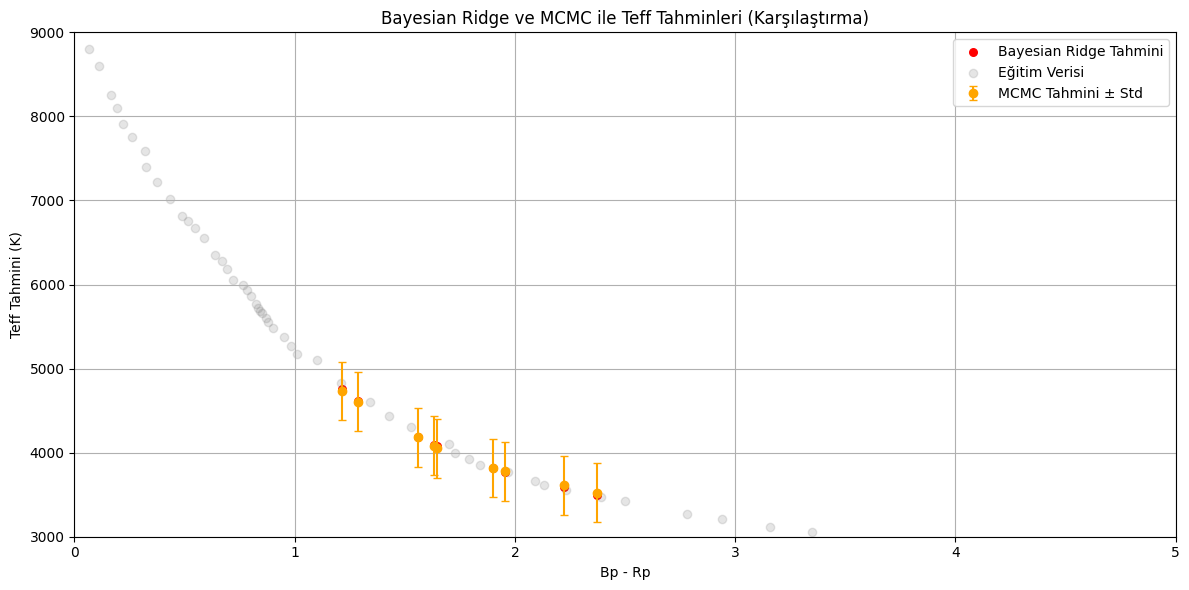

In [5]:
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler()
x_scaled = x_scaler.fit_transform(x.reshape(-1, 1)).flatten()
bprp_scaled = x_scaler.transform(bprp_.reshape(-1, 1)).flatten()

y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.reshape(-1, 1)).flatten()

x_train_jax = jnp.array(np.vander(x_scaled, n_order + 1, increasing=True))
y_train_jax = jnp.array(y_scaled)
x_test_jax = jnp.array(np.vander(bprp_scaled, n_order + 1, increasing=True))


def model(X, Y=None):
    n_features = X.shape[1]
    w = numpyro.sample("w", dist.Normal(0, 10).expand([n_features]))
    sigma = numpyro.sample("sigma", dist.HalfNormal(10.0))
    mean = jnp.dot(X, w)
    with numpyro.plate("data", X.shape[0]):
        numpyro.sample("obs", dist.Normal(mean, sigma), obs=Y)


nuts_kernel = NUTS(model)
mcmc = MCMC(nuts_kernel, num_warmup=3000, num_samples=3000)
mcmc.run(jax.random.PRNGKey(0), X=x_train_jax, Y=y_train_jax)


predictive = Predictive(model, posterior_samples=mcmc.get_samples(), return_sites=["obs"])
predictions = predictive(jax.random.PRNGKey(1), X=x_test_jax)
teff_samples = predictions["obs"]

mean_pred_scaled = np.mean(teff_samples, axis=0)
std_pred_scaled = np.std(teff_samples, axis=0)


mean_pred = y_scaler.inverse_transform(mean_pred_scaled.reshape(-1, 1)).flatten()
std_pred = std_pred_scaled * y_scaler.scale_[0]


plt.figure(figsize=(12, 6))
plt.scatter(bprp_, teff_, color='red', label='Bayesian Ridge Tahmini', s=30)

plt.errorbar(bprp_, mean_pred, yerr=std_pred, fmt='o', color='orange', label='MCMC Tahmini ± Std', capsize=3)
plt.scatter(x, y, alpha=0.2, label='Eğitim Verisi', color='gray')

plt.xlabel("Bp - Rp")
plt.ylabel("Teff Tahmini (K)")
plt.title("Bayesian Ridge ve MCMC ile Teff Tahminleri (Karşılaştırma)")
plt.xlim(0, 5)
plt.ylim(3000, 9000)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
teff_lower = mean_pred - std_pred
teff_upper = mean_pred + std_pred

# DataFrame oluştur
df_out = pd.DataFrame({
    "Bp-Rp": bprp_,
    "Teff_Mean": mean_pred,
    "Teff_Lower": teff_lower,
    "Teff_Upper": teff_upper
})

# CSV dosyasına kaydet
df_out.to_csv("mcmc_teff_predictions.csv", index=False)



sample: 100%|██████████| 6000/6000 [00:35<00:00, 169.68it/s, 255 steps of size 6.31e-03. acc. prob=0.94]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
     sigma      0.16      0.02      0.16      0.14      0.19   1185.71      1.00
      w[0]      2.04      0.06      2.04      1.94      2.15    762.24      1.00
      w[1]     -3.29      0.20     -3.29     -3.60     -2.96    595.66      1.00
      w[2]      1.43      0.18      1.43      1.14      1.73    583.11      1.00
      w[3]     -0.29      0.06     -0.29     -0.39     -0.19    601.64      1.00
      w[4]      0.02      0.01      0.02      0.01      0.03    630.34      1.00

Number of divergences: 0


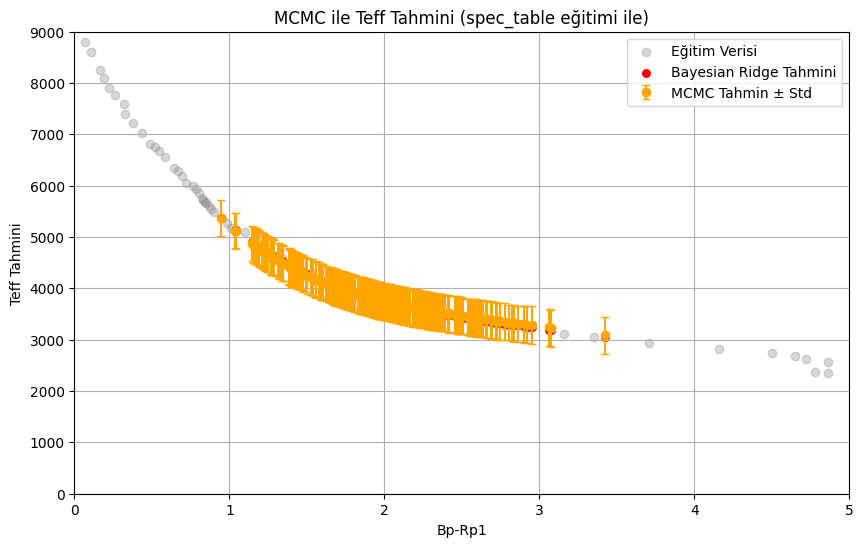

In [6]:
scaler = StandardScaler()

bprp_values = bprp["Bp-Rp1"].values.astype(float)
x_scaled_var = scaler.fit_transform(x.reshape(-1, 1)).flatten()

bprp_scaled_var = scaler.transform(bprp_values.reshape(-1, 1)).flatten()

y_scaler_var = StandardScaler()
y_scaled_var = y_scaler_var.fit_transform(y.reshape(-1, 1)).flatten()


x_train_vander_var = np.vander(x_scaled_var, 3, increasing=True)
x_train_jax_var = jnp.array(x_train_vander_var)

x_test_vander_var = np.vander(bprp_scaled_var, n_order + 1, increasing=True)
x_test_jax_var = jnp.array(x_test_vander_var)

def model(X, Y=None):
    n_features = X.shape[1]
    w = numpyro.sample("w", dist.Normal(0, 10).expand([n_features]))
    sigma = numpyro.sample("sigma", dist.HalfNormal(10.0))
    mean = jnp.dot(X, w)
    with numpyro.plate("data", X.shape[0]):
        numpyro.sample("obs", dist.Normal(mean, sigma), obs=Y)



x_train_vander_var = np.vander(x, n_order + 1, increasing=True)
x_train_jax_var = jnp.array(x_train_vander_var)
y_train_jax_var = jnp.array(y_scaled_var)


nuts_kernel = NUTS(model)
mcmc = MCMC(nuts_kernel, num_warmup=3000, num_samples=3000)
mcmc.run(jax.random.PRNGKey(0), X=x_train_jax_var, Y=y_train_jax_var)
mcmc.print_summary()


x_test_vander_var = np.vander(bprp_values, n_order + 1, increasing=True)
x_test_jax_var = jnp.array(x_test_vander_var)


predictive = Predictive(model, posterior_samples=mcmc.get_samples(), return_sites=["obs"])
predictions = predictive(jax.random.PRNGKey(1), X=x_test_jax_var)
teff_samples = predictions["obs"]


mean_pred_scaled = np.mean(teff_samples, axis=0)
std_pred_scaled = np.std(teff_samples, axis=0)

mean_pred = y_scaler_var.inverse_transform(mean_pred_scaled.reshape(-1, 1)).flatten()
std_pred = std_pred_scaled * y_scaler_var.scale_[0]  # std için sadece scale çarpılır

bprp["teffTahminleri_MCMC"] = mean_pred
bprp["stdSapma"] = std_pred
std_pred

plt.figure(figsize=(10, 6))
plt.errorbar(bprp_values, mean_pred, yerr=std_pred,
             fmt='o', label="MCMC Tahmin ± Std", color='orange', capsize=3)
plt.xlabel("Bp-Rp1")
plt.scatter(x, y, alpha=0.3, label="Eğitim Verisi", color='gray')
plt.scatter(bprp_values, teff_pred, color='red', label='Bayesian Ridge Tahmini', s=30)
plt.ylabel("Teff Tahmini")
plt.title("MCMC ile Teff Tahmini (spec_table eğitimi ile)")
plt.legend()
plt.grid(True)
plt.xlim(0, 5.0)
plt.ylim(0, 9000)
plt.show()


In [ ]:
!pip install corner


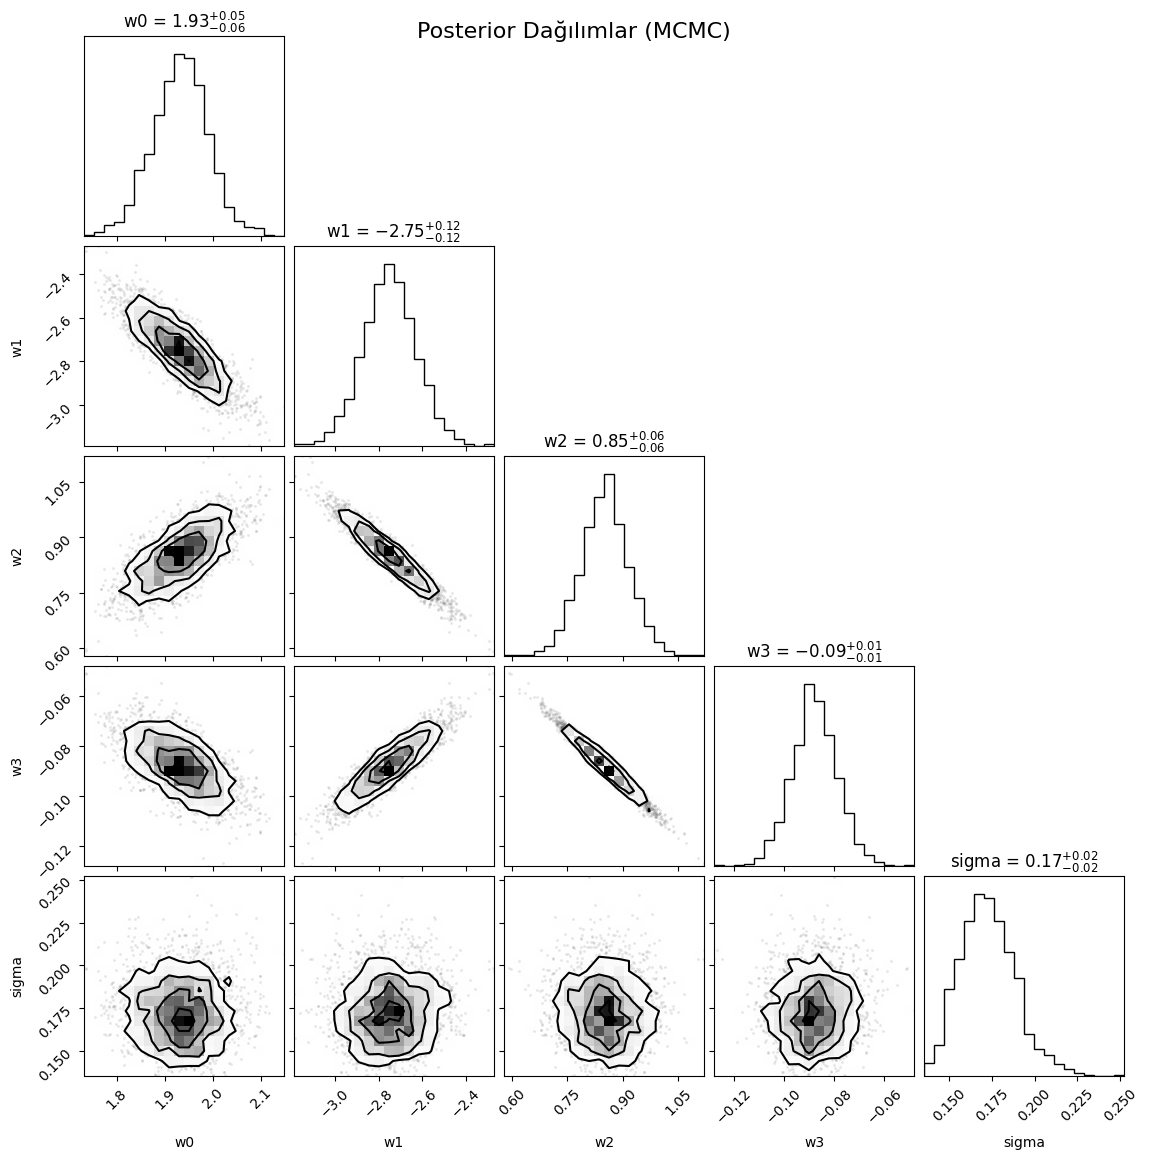

In [ ]:
import arviz as az
import corner
import numpy as np
# Posterior örnekleri
samples = mcmc.get_samples()
w_samples = samples["w"]
sigma_samples = samples["sigma"].reshape(-1, 1)

# Hepsini birleştir
corner_data = np.hstack([w_samples, sigma_samples])
labels = [f"w{i}" for i in range(w_samples.shape[1])] + ["sigma"]


corner.corner(corner_data, labels=labels, show_titles=True, title_kwargs={"fontsize": 12})
plt.suptitle("Posterior Dağılımlar (MCMC)", fontsize=16)
plt.show()


In [ ]:
 # Bp-Rp aralığını genişletiyoruz (-1.0 ile 6.0 arası, 0.05 adım)
bp_rp_new = np.arange(0, 5.0, 0.02)


In [ ]:
def teff_func(bp_rp):
    if isinstance(bp_rp, (int, float)):
        # Tek değer girildiyse
        bp_rp = np.array([bp_rp])
    teff_values = []
    for x in bp_rp:
        if 0.0 <= x < 2.0:
            teff = (
                9795.7886
                + (-7563.6662) * x
                + 3800.2697 * (x ** 2)
                + (-779.4585) * (x ** 3)
            )
        elif 2.0 <= x <= 5.0:
            teff = (
                4044.6796
                + (-42.5471) * x
                + (-105.4588) * (x ** 2)
                + (10.0511) * (x ** 3)
            )
        else:
            teff = np.nan  # Aralık dışıysa boş
        teff_values.append(teff)
    return np.array(teff_values)

teff_new = teff_func(bp_rp_new)

df_sent = pd.DataFrame({
    "Bp-Rp": bp_rp_new,
    "Teff": teff_new
})

df_sent.head()

,Bp-Rp,Teff
0,0.00,9795.788600
1,0.02,9646.029148
2,0.04,9499.272498
3,0.06,9355.481236
4,0.08,9214.617947


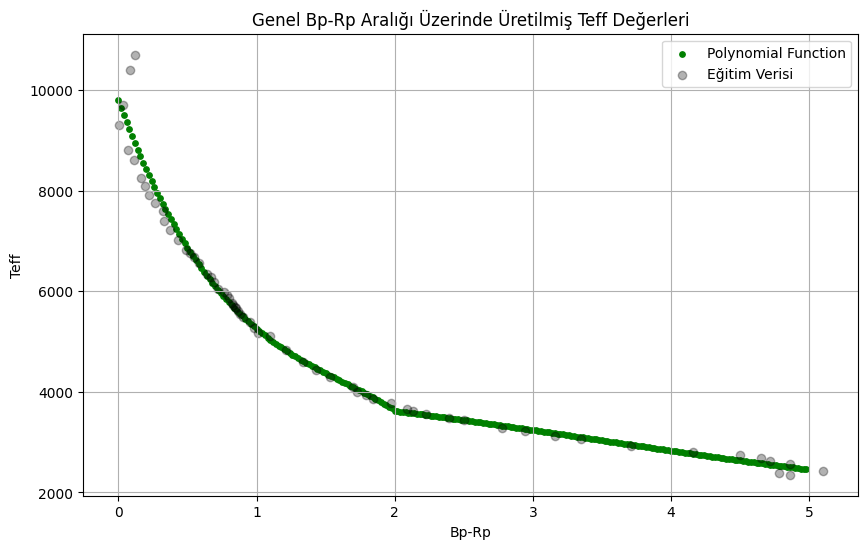

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(bp_rp_new, teff_new, label="Polynomial Function", color='green',s=15)
plt.scatter(x, y, alpha=0.3, label="Eğitim Verisi", color='black')
plt.xlabel("Bp-Rp")
plt.ylabel("Teff")
plt.title("Genel Bp-Rp Aralığı Üzerinde Üretilmiş Teff Değerleri")
plt.grid(True)
plt.legend()
plt.show()


sample: 100%|██████████| 12000/12000 [00:25<00:00, 475.11it/s, 127 steps of size 2.68e-02. acc. prob=0.94]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
     sigma      0.17      0.02      0.17      0.15      0.20   2419.36      1.00
      w[0]      1.93      0.06      1.93      1.84      2.03   1733.14      1.00
      w[1]     -2.75      0.13     -2.75     -2.97     -2.55   1371.21      1.00
      w[2]      0.85      0.07      0.85      0.74      0.97   1353.77      1.00
      w[3]     -0.09      0.01     -0.09     -0.10     -0.07   1415.03      1.00

Number of divergences: 0


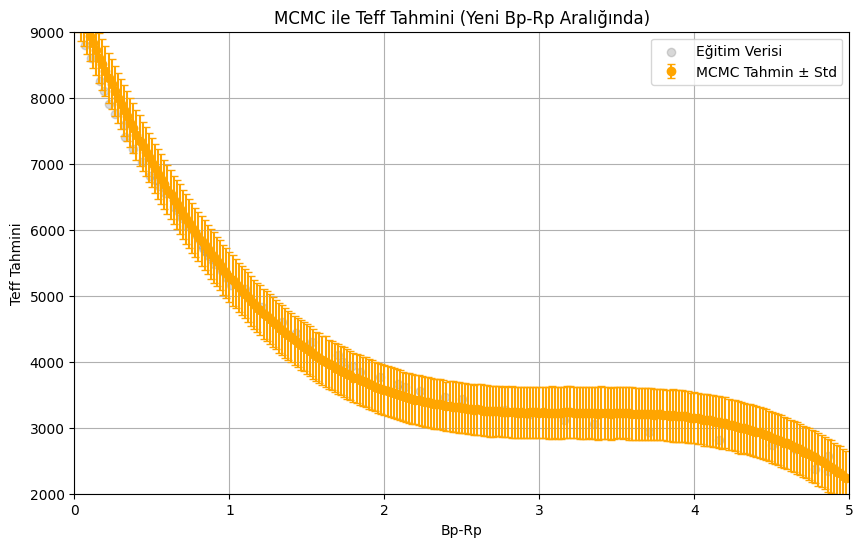

In [ ]:


from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
x_scaled = scaler.fit_transform(x.reshape(-1, 1)).flatten()
bprp_scaled = scaler.transform(bprp_values.reshape(-1, 1)).flatten()

y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.reshape(-1, 1)).flatten()


x_train_vander = np.vander(x_scaled, 3, increasing=True)
x_train_jax = jnp.array(x_train_vander)

x_test_vander = np.vander(bprp_scaled, n_order + 1, increasing=True)
x_test_jax = jnp.array(x_test_vander)

def model(X, Y=None):
    n_features = X.shape[1]
    w = numpyro.sample("w", dist.Normal(0, 10).expand([n_features]))
    sigma = numpyro.sample("sigma", dist.HalfNormal(10.0))
    mean = jnp.dot(X, w)
    with numpyro.plate("data", X.shape[0]):
        numpyro.sample("obs", dist.Normal(mean, sigma), obs=Y)


x_train_vander = np.vander(x, n_order + 1, increasing=True)
x_train_jax = jnp.array(x_train_vander)
y_train_jax = jnp.array(y_scaled)


nuts_kernel = NUTS(model)
mcmc = MCMC(nuts_kernel, num_warmup=6000, num_samples=6000)
mcmc.run(jax.random.PRNGKey(0), X=x_train_jax, Y=y_train_jax)
mcmc.print_summary()


x_test_vander = np.vander(bp_rp_new, n_order + 1, increasing=True)
x_test_jax = jnp.array(x_test_vander)


predictive = Predictive(model, posterior_samples=mcmc.get_samples(), return_sites=["obs"])
predictions = predictive(jax.random.PRNGKey(1), X=x_test_jax)
teff_samples = predictions["obs"]


mean_pred_scaled = np.mean(teff_samples, axis=0)
std_pred_scaled = np.std(teff_samples, axis=0)

mean_pred = y_scaler.inverse_transform(mean_pred_scaled.reshape(-1, 1)).flatten()
std_pred = std_pred_scaled * y_scaler.scale_[0]



df_sent["teffTahminleri_MCMC"] = mean_pred
df_sent["stdSapma"] = std_pred
std_pred

plt.figure(figsize=(10, 6))
plt.errorbar(df_sent["Bp-Rp"], mean_pred, yerr=std_pred,
             fmt='o', label="MCMC Tahmin ± Std", color='orange', capsize=3)
plt.xlabel("Bp-Rp")
plt.scatter(x, y, alpha=0.3, label="Eğitim Verisi", color='gray')
plt.ylabel("Teff Tahmini")
plt.title("MCMC ile Teff Tahmini (Yeni Bp-Rp Aralığında)")
plt.legend()
plt.grid(True)
plt.xlim(0, 5.0)
plt.ylim(2000, 9000)
plt.show()




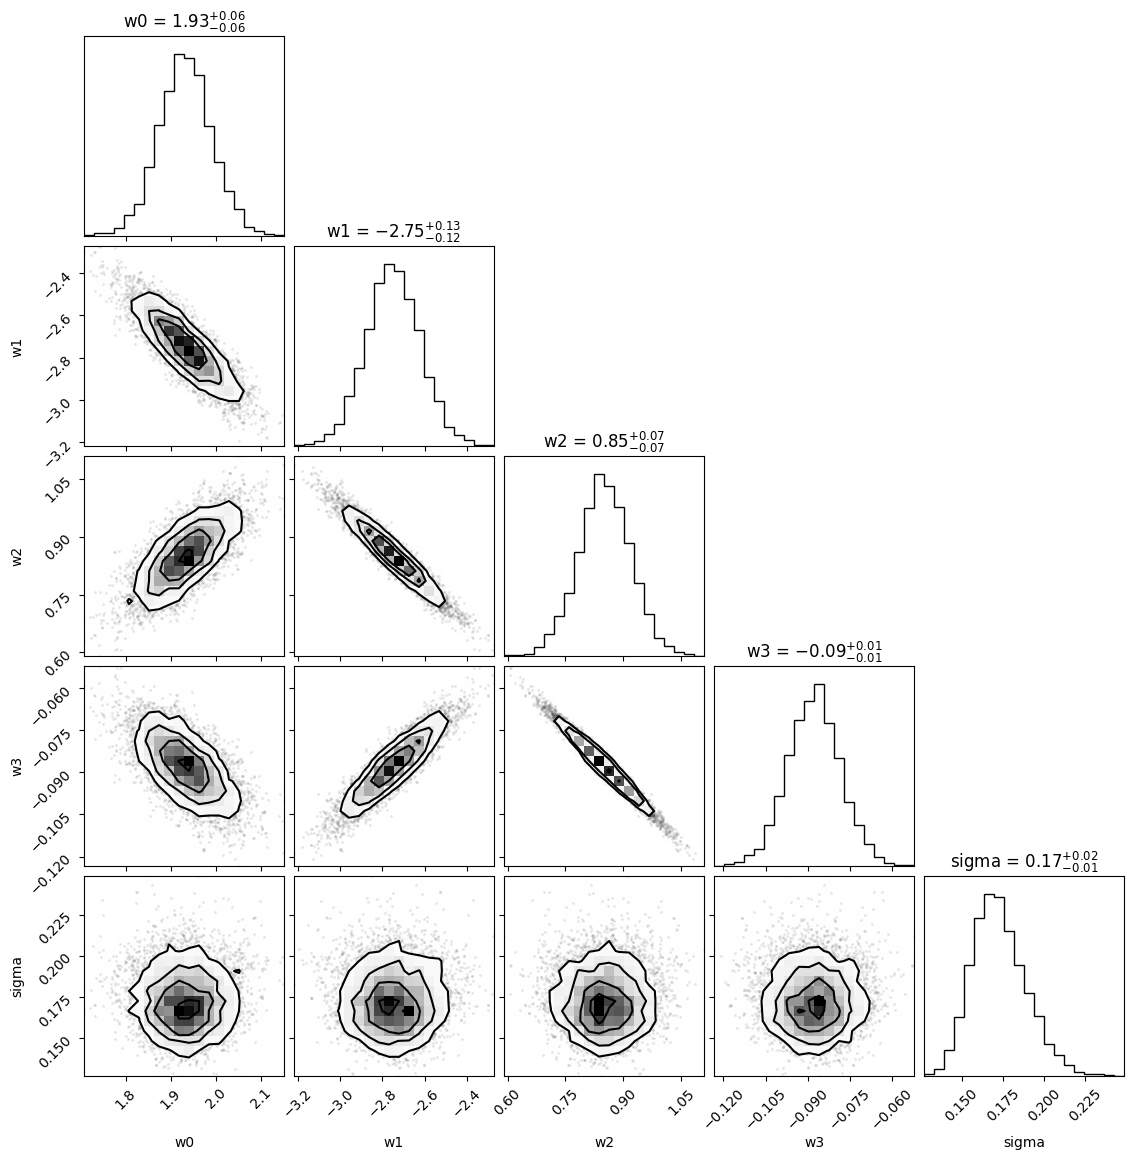

In [ ]:
import corner
import arviz as az
samples_dict=mcmc.get_samples()

param_array = np.column_stack([samples_dict["w"][:, i] for i in range(samples_dict["w"].shape[1])] + [samples_dict["sigma"]])
labels = [f"w{i}" for i in range(samples_dict["w"].shape[1])] + ["sigma"]

fig = corner.corner(
    param_array,
    labels=labels,
    show_titles=True,
    title_kwargs={"fontsize": 12},
    truths=None
)
plt.show()

In [ ]:
from scipy.interpolate import interp1d

interp_func = interp1d(df_sent["Bp-Rp"], df_sent["teffTahminleri_MCMC"],
                       bounds_error=False, fill_value="extrapolate")

teff_tahmin_edilen = interp_func(x)

hatalar = y - teff_tahmin_edilen

df_hatalar = pd.DataFrame({
    "Bp-Rp": x,
    "Gerçek_Teff": y,
    "Model_Teff": teff_tahmin_edilen,
    "Hata (Gerçek - Tahmin)": hatalar
})

mae = mean_absolute_error(y, teff_tahmin_edilen)
rmse = np.sqrt(mean_squared_error(y, teff_tahmin_edilen))


print("\n--- Hata Tablosu ---")
display(df_hatalar)




--- Hata Tablosu ---


,Bp-Rp,Gerçek_Teff,Model_Teff,Hata (Gerçek - Tahmin)
0,0.120,10700,8822.846680,1877.153320
1,0.087,10400,9007.087109,1392.912891
2,0.037,9700,9274.805957,425.194043
3,0.005,9300,9465.519043,-165.519043
4,0.068,8800,9117.663281,-317.663281
...,...,...,...,...
58,4.720,2630,2623.714844,6.285156
59,4.860,2570,2427.302002,142.697998
60,5.100,2420,2048.230713,371.769287
61,4.780,2380,2553.970215,-173.970215
